In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.losses import MeanSquaredError
from tensorflow.python.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_absolute_error 
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras_tuner import RandomSearch
from math import sqrt
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
inf_data1 = pd.read_csv(r"C:\Users\meena\OneDrive\Desktop\Documents\Mini_Project_2\Mini_Project2_Data.csv")
inf_data1.head()

season  date_code  weekending      region respiratory_virus  \
0  2009-2010     200940  10-10-2009    Bay Area       Influenza_A   
1  2009-2010     200940  10-10-2009    Bay Area       Influenza_B   
2  2009-2010     200940  10-10-2009    Bay Area   Total_Influenza   
3  2009-2010     200940  10-10-2009    Bay Area               RSV   
4  2009-2010     200940  10-10-2009  California       Influenza_A   

   number_positive  specimens_tested  percent_positive  
0               36               220             16.36  
1                0               220              0.00  
2               36               220             16.36  
3                0               190              0.00  
4             1077              3324             32.40

In [4]:
inf_data1.isnull().sum()

season                  0
date_code               0
weekending              0
region                  0
respiratory_virus       0
number_positive         0
specimens_tested        0
percent_positive     7597
dtype: int64

In [5]:
inf_data1 = inf_data1.dropna()
inf_data1.isnull().sum()

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64

In [6]:
inf_data1['region'].value_counts()

California              7137
Central                 7121
Upper Southern          6999
Bay Area                5817
Lower Southern          5744
Northern                5140
Upper/Lower Southern    4404
Northern/Bay Area         52
Name: region, dtype: int64

In [7]:
inf_data1['season'].value_counts()

2018-2019    6045
2019-2020    6024
2017-2018    5931
2016-2017    5754
2015-2016    5608
2014-2015    4551
2013-2014    3460
2010-2011    1339
2011-2012    1261
2009-2010    1224
2012-2013    1217
Name: season, dtype: int64

In [8]:
inf_data1['respiratory_virus'].value_counts()

Influenza_A                  3668
Influenza_B                  3668
Total_Influenza              3668
RSV                          3641
Enterovirus_Rhinovirus       2322
Total_Parainfluenza          2321
Parainfluenza_UnknownType    2321
Parainfluenza_4              2321
Parainfluenza_3              2321
Parainfluenza_2              2321
Parainfluenza_1              2321
Adenovirus                   2320
HMPV                         2313
Coronavirus_HKU1             1148
Coronavirus_NL63             1148
Coronavirus_OC43             1148
Coronavirus_229E             1148
Coronavirus_UnknownType      1148
Total_Coronavirus            1148
Name: respiratory_virus, dtype: int64

In [9]:
inf_data1 = inf_data1.drop(['date_code'], axis = 1)

In [10]:
pd.set_option('mode.chained_assignment', None)

In [11]:
df1 = inf_data1.loc[inf_data1['respiratory_virus'] == 'Influenza_A'].copy()
df2 = inf_data1.loc[inf_data1["respiratory_virus"] == "RSV"].copy()
df3 = inf_data1.loc[inf_data1["respiratory_virus"] == "Adenovirus"].copy()
df4 = inf_data1.loc[inf_data1["respiratory_virus"] == "HMPV"].copy()

In [12]:
inf_df1 = pd.concat([df2, df1], ignore_index = True, axis = 0)
inf_df2 = pd.concat([inf_df1, df3], ignore_index = True, axis = 0)
inf_df3 = pd.concat([inf_df2, df4], ignore_index = True, axis = 0)
inf_df3.head()

season  weekending             region respiratory_virus  \
0  2009-2010  10-10-2009           Bay Area               RSV   
1  2009-2010  10-10-2009         California               RSV   
2  2009-2010  10-10-2009            Central               RSV   
3  2009-2010  10-10-2009     Lower Southern               RSV   
4  2009-2010  10-10-2009  Northern/Bay Area               RSV   

   number_positive  specimens_tested  percent_positive  
0                0               190              0.00  
1                2              2218              0.09  
2                0               329              0.00  
3                0                35              0.00  
4                2              1510              0.13

In [13]:
inf_df3['respiratory_virus'].value_counts()

Influenza_A    3668
RSV            3641
Adenovirus     2320
HMPV           2313
Name: respiratory_virus, dtype: int64

## ***CALIFORNIA***

In [14]:
df_reg1 = inf_df3.loc[inf_df3['region'] == 'Central'].copy()
df_reg1.head()

season  weekending   region respiratory_virus  number_positive  \
2   2009-2010  10-10-2009  Central               RSV                0   
9   2009-2010  17-10-2009  Central               RSV                0   
15  2009-2010  24-10-2009  Central               RSV                0   
21  2009-2010  31-10-2009  Central               RSV                2   
27  2009-2010  07-11-2009  Central               RSV                0   

    specimens_tested  percent_positive  
2                329               0.0  
9                380               0.0  
15               278               0.0  
21               201               1.0  
27               176               0.0

In [15]:
df_reg1_rv1 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Influenza_A']
df_reg1_rv1

season  weekending   region respiratory_virus  number_positive  \
3643  2009-2010  10-10-2009  Central       Influenza_A              202   
3650  2009-2010  17-10-2009  Central       Influenza_A              195   
3656  2009-2010  24-10-2009  Central       Influenza_A              162   
3662  2009-2010  31-10-2009  Central       Influenza_A              101   
3668  2009-2010  07-11-2009  Central       Influenza_A               96   
...         ...         ...      ...               ...              ...   
7281  2019-2020  29-08-2020  Central       Influenza_A                0   
7287  2019-2020  05-09-2020  Central       Influenza_A                0   
7293  2019-2020  12-09-2020  Central       Influenza_A                0   
7299  2019-2020  19-09-2020  Central       Influenza_A                0   
7305  2019-2020  26-09-2020  Central       Influenza_A                0   

      specimens_tested  percent_positive  
3643               787             25.67  
3650               585             33.33  
3656               498             32.53  
3662               366             27.60  
3668               421             22.80  
...                ...               ...  
7281                38              0.00  
7287                34              0.00  
7293                32              0.00  
7299                29              0.00  
7305                44              0.00  

[572 rows x 7 columns]

### **Influenza A**

In [16]:
import warnings
  

warnings.filterwarnings('ignore')

In [17]:
df_r11 = df_reg1_rv1[['weekending', 'percent_positive']]
df_r11['InfA_PP'] = df_r11['percent_positive']
df_r11 = df_r11.drop(['percent_positive'], axis = 1)
df_r11['Year'] = pd.DatetimeIndex(df_r11['weekending']).year
df_r11.head()

weekending  InfA_PP  Year
3643  10-10-2009    25.67  2009
3650  17-10-2009    33.33  2009
3656  24-10-2009    32.53  2009
3662  31-10-2009    27.60  2009
3668  07-11-2009    22.80  2009

In [18]:
df_r11['InfA_PP'].describe()

count    572.000000
mean       5.205420
std        8.757989
min        0.000000
25%        0.000000
50%        0.745000
75%        6.350000
max       49.040000
Name: InfA_PP, dtype: float64

In [19]:
# plotting scattered graph
fig = px.scatter(df_r11, x='Year', y='InfA_PP')
fig.show()

In [20]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model_r11=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model_r11.fit(df_r11[['InfA_PP']].values)
df_r11['scores']=forest_model_r11.decision_function(df_r11[['InfA_PP']].values)
df_r11['anomaly_value']=forest_model_r11.predict(df_r11[['InfA_PP']].values)
print(df_r11.head(10))
print("Anomaly Values")
print(df_r11['anomaly_value'].value_counts())

      weekending  InfA_PP  Year    scores  anomaly_value
3643  10-10-2009    25.67  2009 -0.012008             -1
3650  17-10-2009    33.33  2009 -0.103839             -1
3656  24-10-2009    32.53  2009 -0.079042             -1
3662  31-10-2009    27.60  2009 -0.031088             -1
3668  07-11-2009    22.80  2009 -0.012791             -1
3675  14-11-2009    16.16  2009  0.007398              1
3682  21-11-2009    13.39  2009 -0.002730             -1
3689  28-11-2009     7.72  2009  0.016918              1
3696  05-12-2009     9.75  2009  0.002858              1
3703  12-12-2009     8.14  2009  0.010093              1
Anomaly Values
 1    497
-1     75
Name: anomaly_value, dtype: int64


Here, the contamination parameter defines a rough estimate of the percentage of the outliers in our dataset. So, we have assigned contamination to be 10% in our case.

In [21]:
df_r11.set_index('Year', drop = True, inplace = True)
a_r11 = df_r11.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_r11.index.astype(str),y=df_r11['InfA_PP'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_r11.index.astype(str),y=a_r11['InfA_PP'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

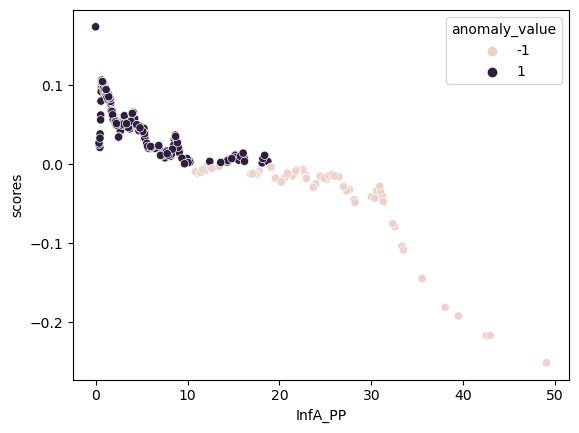

In [22]:
sns.scatterplot(x = 'InfA_PP', y = 'scores', hue = 'anomaly_value', data = df_r11)
plt.show()

## **LSTM MODEL**

In [23]:
df_r11  = df_r11[df_r11.anomaly_value != -1]
df_r11.shape

(497, 4)

In [24]:

df_r11 = df_r11.drop(['weekending','scores', 'anomaly_value'], axis = 1)
df_r11.head()

InfA_PP
Year         
2009    16.16
2009     7.72
2009     9.75
2009     8.14
2009     8.65

In [25]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [26]:
window_size = 5
X_r11, y_r11 = df_to_X_y(df_r11, window_size)
X_r11.shape, y_r11.shape

((492, 5, 1, 1), (492, 1))

In [27]:
X_train_r11, y_train_r11 = X_r11[:250], y_r11[:250]
X_val_r11, y_val_r11 = X_r11[250:400], y_r11[250:400]
X_test_r11, y_test_r11 = X_r11[400:], y_r11[400:]

X_train_r11.shape, y_train_r11.shape, X_test_r11.shape, y_test_r11.shape, X_val_r11.shape, y_val_r11.shape 

((250, 5, 1, 1), (250, 1), (92, 5, 1, 1), (92, 1), (150, 5, 1, 1), (150, 1))

In [28]:

def build_model(hp):                 #hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape=(5, 1)))
    #providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers',2,20)):         
        #providing range for number of neurons in hidden layers
        model.add(Dense(units=hp.Int('num_of_neurons'+ str(i),min_value=32,max_value=512,step=32),
                                    activation='relu'))
    model.add(Dense(1,activation='relu'))    #output layer
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[0.1, 0.01, 0.001, 0.0001])),   #tuning learning rate
                  loss='mae',metrics=[RootMeanSquaredError()])
    return model
    

In [29]:
import keras_tuner as kt
import tensorflow as tf
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_loss",
                     max_epochs=20,
                     directory="kt_dir",
                     project_name="kt_hyperband",)


INFO:tensorflow:Reloading Tuner from kt_dir\kt_hyperband\tuner0.json


In [30]:
# summary of tuner
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
num_of_neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max

In [31]:
# Tunner search
tuner.search(X_train_r11, y_train_r11, epochs = 10, validation_data = (X_val_r11, y_val_r11))
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r11 = optimum_model.fit(X_train_r11, y_train_r11, epochs = nb_epochs,validation_data = (X_val_r11, y_val_r11) ).history



INFO:tensorflow:Oracle triggered exit
Epoch 1/25
8/8 [==============================] - 2s 46ms/step - loss: 1.6536 - root_mean_squared_error: 3.8322 - val_loss: 1.2151 - val_root_mean_squared_error: 3.0262
Epoch 2/25
8/8 [==============================] - 0s 9ms/step - loss: 1.0375 - root_mean_squared_error: 2.7947 - val_loss: 1.2842 - val_root_mean_squared_error: 2.5870
Epoch 3/25
8/8 [==============================] - 0s 11ms/step - loss: 0.9664 - root_mean_squared_error: 2.5300 - val_loss: 1.3275 - val_root_mean_squared_error: 2.4343
Epoch 4/25
8/8 [==============================] - 0s 11ms/step - loss: 0.8877 - root_mean_squared_error: 2.3998 - val_loss: 1.3451 - val_root_mean_squared_error: 2.3439
Epoch 5/25
8/8 [==============================] - 0s 11ms/step - loss: 0.8284 - root_mean_squared_error: 2.3210 - val_loss: 1.2763 - val_root_mean_squared_error: 2.2761
Epoch 6/25
8/8 [==============================] - 0s 11ms/step - loss: 0.8612 - root_mean_squared_error: 2.2550 - val_

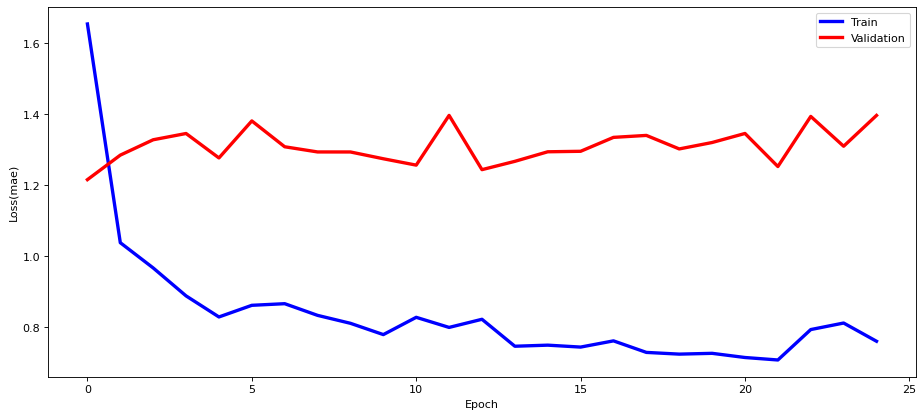

In [32]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r11['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r11['val_loss'], 'r', label = 'Validation', linewidth = 3)
ax.set_title('', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

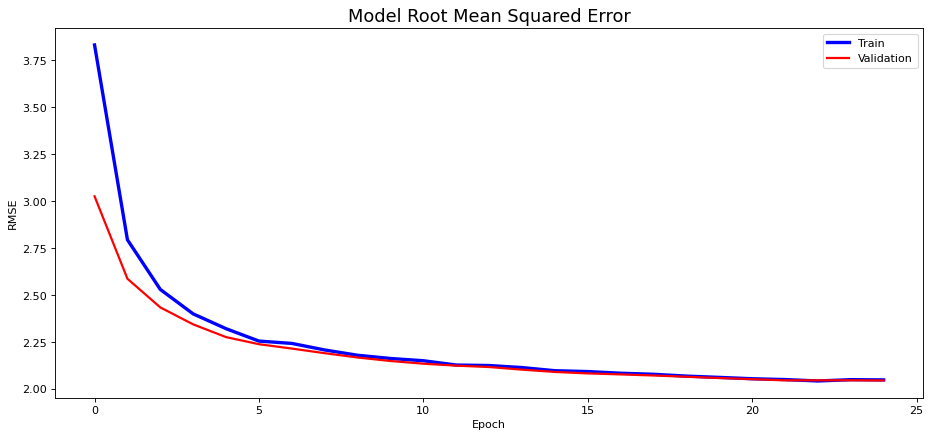

In [33]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r11['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r11['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

3/3 [==============================] - 0s 5ms/step


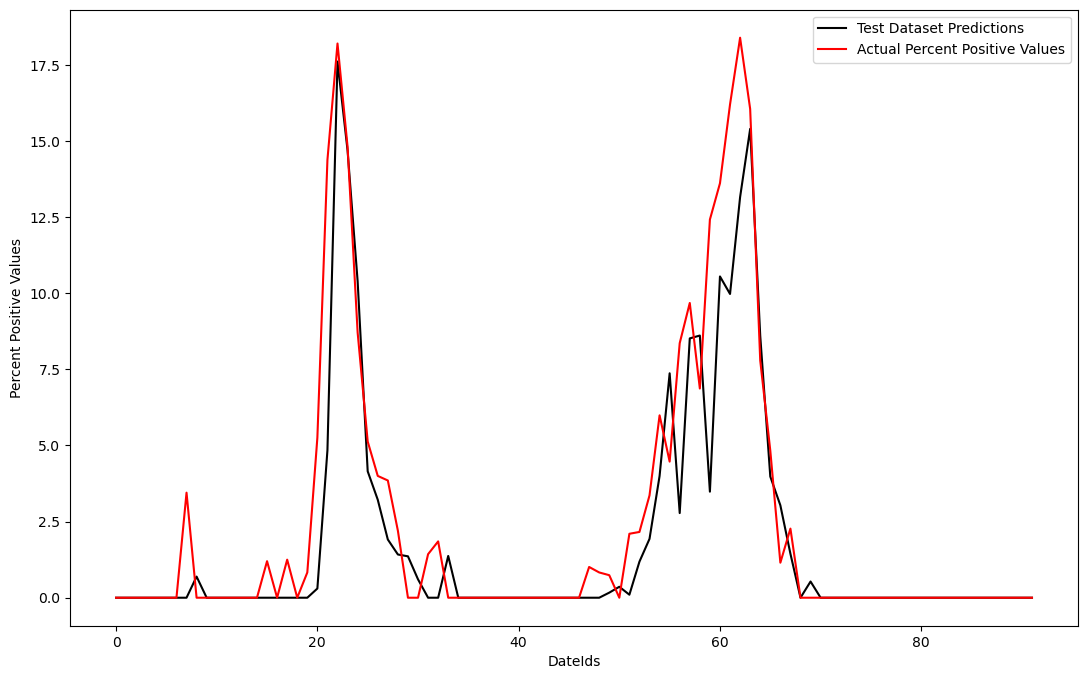

In [34]:
test_pred_r11 = optimum_model.predict(X_test_r11).flatten()
test_results_r11 = pd.DataFrame(data={'Test Predictions': test_pred_r11, 'Actual Percent Positive Values':y_test_r11.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r11['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r11['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [35]:
error_r11= mean_squared_error(y_test_r11, test_pred_r11)
print("RootMeanSquaredError: ", np.sqrt(error_r11))

mae_r11 = mean_absolute_error(y_test_r11, test_pred_r11)
print("Mean Absolute Error: ", mae_r11)


RootMeanSquaredError:  2.002976347056656
Mean Absolute Error:  0.9237399748162083


### SARIMA Model


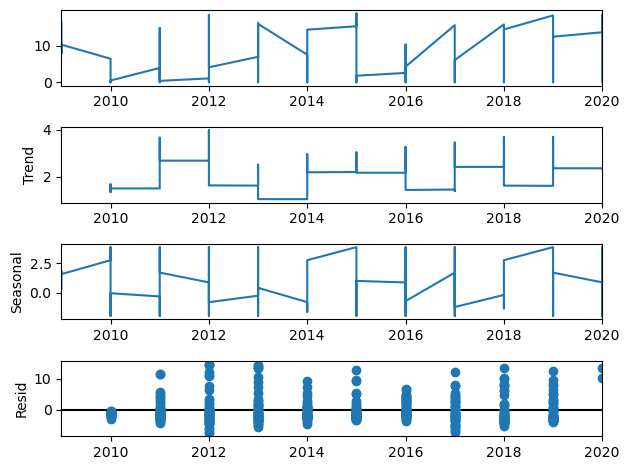

In [36]:
seasonal_decompose(df_r11, model='additive', period = 60).plot();

In [37]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')


In [38]:
adf_test(df_r11['InfA_PP'])

1. ADF :  -7.325915127934126
2. P-Value :  1.161203885875827e-10
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 491
5. Critical Values :
	 1% :  -3.4437386290417082
	 5% :  -2.867444458865948
	 10% :  -2.5699148492415413
The series is stationary


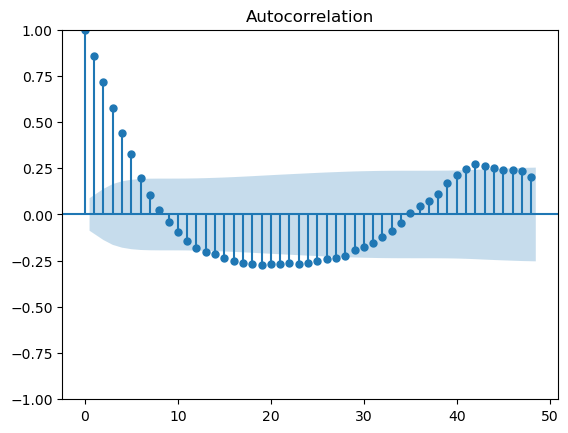

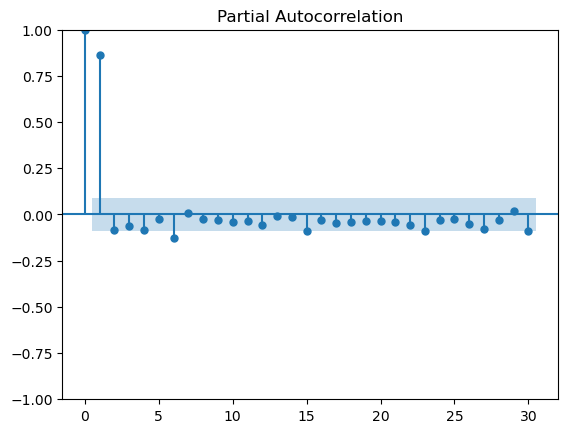

In [39]:
plot_acf(df_r11['InfA_PP'], lags=48);
plot_pacf(df_r11['InfA_PP'], lags=30);

In [40]:
from tqdm import tqdm_notebook

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [41]:
from itertools import product
p = q = P = Q = range(0, 2, 1)
d = 0
D = 0
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

16


In [42]:
import warnings
  

warnings.filterwarnings('ignore')

In [43]:
result_df_r11 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r11['InfA_PP'])
result_df_r11


  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0   (1, 1, 0, 0)  2129.633863
1   (1, 1, 0, 1)  2130.607411
2   (1, 1, 1, 0)  2130.684530
3   (1, 1, 1, 1)  2131.263362
4   (1, 0, 0, 0)  2133.647389
5   (1, 0, 1, 1)  2134.094804
6   (1, 0, 0, 1)  2134.569300
7   (1, 0, 1, 0)  2134.674554
8   (0, 1, 1, 0)  2379.963431
9   (0, 1, 1, 1)  2381.158814
10  (0, 1, 0, 1)  2404.769896
11  (0, 1, 0, 0)  2525.593989
12  (0, 0, 1, 1)  2752.876255
13  (0, 0, 1, 0)  2757.031026
14  (0, 0, 0, 1)  2789.796214
15  (0, 0, 0, 0)  2963.686587

In [44]:
best_model_r11 = SARIMAX(df_r11['InfA_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 4)).fit(dis=-1)
print(best_model_r11.summary())


                               SARIMAX Results                                
Dep. Variable:                InfA_PP   No. Observations:                  497
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1061.817
Date:                Thu, 02 Feb 2023   AIC                           2129.634
Time:                        13:41:45   BIC                           2142.260
Sample:                             0   HQIC                          2134.589
                                - 497                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8890      0.012     73.618      0.000       0.865       0.913
ma.L1          0.1222      0.034      3.612      0.000       0.056       0.189
sigma2         4.1847      0.121     34.638      0.0

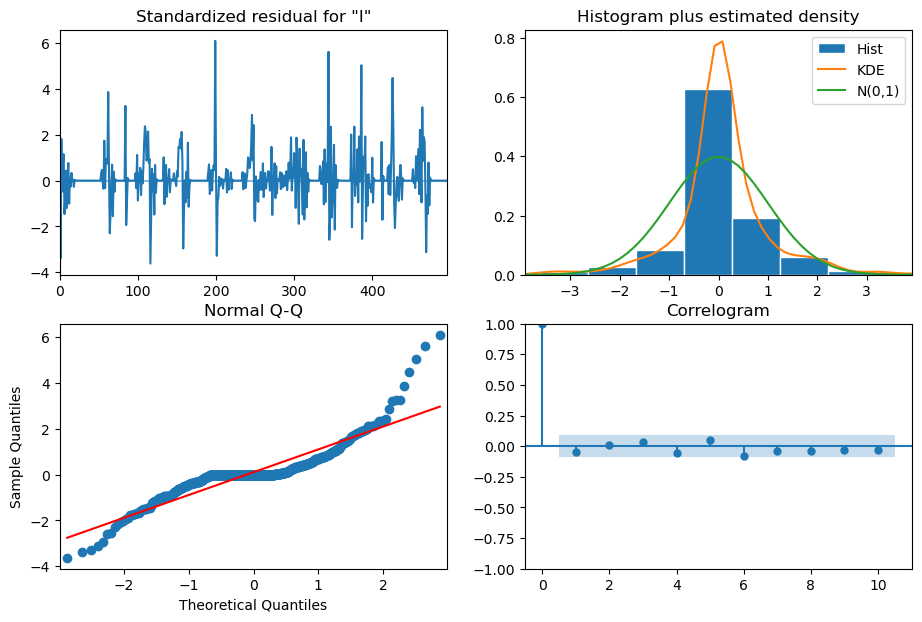

In [45]:
best_model_r11.plot_diagnostics(figsize=(11,7));

In [46]:
pred_r11 = best_model_r11.predict()

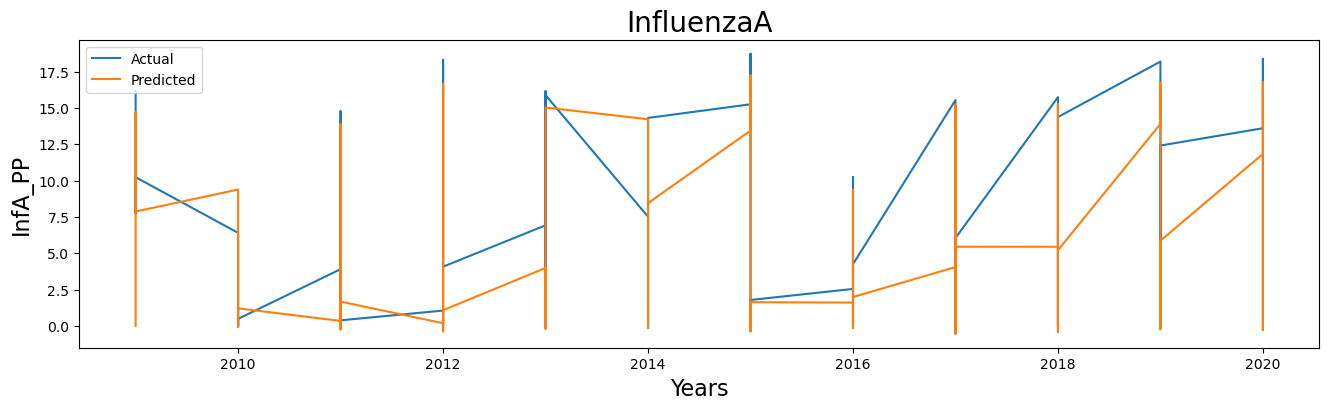

In [47]:
plt.figure(figsize=(16,4))
plt.plot(df_r11['InfA_PP'], label="Actual")
plt.plot(pred_r11, label="Predicted")
plt.title('InfluenzaA', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('InfA_PP', fontsize=16)
plt.legend()

In [48]:
error_r1= mean_squared_error(df_r11['InfA_PP'], pred_r11)
print("RootMeanSquaredError: ", np.sqrt(error_r1))

mae_r1 = mean_absolute_error(df_r11['InfA_PP'], pred_r11)
print("Mean Absolute Error: ", mae_r1)


RootMeanSquaredError:  2.149876364781435
Mean Absolute Error:  1.1364042448617067


## **RSV**

In [49]:
df_reg1_rv2 = df_reg1.loc[df_reg1['respiratory_virus'] == 'RSV']
df_reg1_rv2

season  weekending   region respiratory_virus  number_positive  \
2     2009-2010  10-10-2009  Central               RSV                0   
9     2009-2010  17-10-2009  Central               RSV                0   
15    2009-2010  24-10-2009  Central               RSV                0   
21    2009-2010  31-10-2009  Central               RSV                2   
27    2009-2010  07-11-2009  Central               RSV                0   
...         ...         ...      ...               ...              ...   
3613  2019-2020  29-08-2020  Central               RSV                0   
3619  2019-2020  05-09-2020  Central               RSV                0   
3625  2019-2020  12-09-2020  Central               RSV                0   
3631  2019-2020  19-09-2020  Central               RSV                0   
3637  2019-2020  26-09-2020  Central               RSV                0   

      specimens_tested  percent_positive  
2                  329               0.0  
9                  380               0.0  
15                 278               0.0  
21                 201               1.0  
27                 176               0.0  
...                ...               ...  
3613                38               0.0  
3619                34               0.0  
3625                31               0.0  
3631                28               0.0  
3637                43               0.0  

[572 rows x 7 columns]

In [50]:
df_r12 = df_reg1_rv2[['weekending', 'percent_positive']]
df_r12['RSV_PP'] = df_r12['percent_positive']
df_r12 = df_r12.drop(['percent_positive'], axis = 1)
df_r12['Year'] = pd.DatetimeIndex(df_r12['weekending']).year
df_r12.head()

weekending  RSV_PP  Year
2   10-10-2009     0.0  2009
9   17-10-2009     0.0  2009
15  24-10-2009     0.0  2009
21  31-10-2009     1.0  2009
27  07-11-2009     0.0  2009

In [51]:
df_r12['RSV_PP'].describe()

count    572.000000
mean       8.133899
std       11.062834
min        0.000000
25%        0.000000
50%        2.600000
75%       12.932500
max       54.330000
Name: RSV_PP, dtype: float64

In [52]:
# plotting scattered graph
fig = px.scatter(df_r12, x='Year', y='RSV_PP')
fig.show()

In [53]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model_r12=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model_r12.fit(df_r12[['RSV_PP']].values)
df_r12['scores']=forest_model_r12.decision_function(df_r12[['RSV_PP']].values)
df_r12['anomaly_value']=forest_model_r12.predict(df_r12[['RSV_PP']].values)
print(df_r12.head(10))
print("Anomaly Values")
print(df_r12['anomaly_value'].value_counts())

    weekending  RSV_PP  Year    scores  anomaly_value
2   10-10-2009    0.00  2009  0.117774              1
9   17-10-2009    0.00  2009  0.117774              1
15  24-10-2009    0.00  2009  0.117774              1
21  31-10-2009    1.00  2009  0.025478              1
27  07-11-2009    0.00  2009  0.117774              1
34  14-11-2009    0.52  2009 -0.034200             -1
41  21-11-2009    0.65  2009 -0.005487             -1
48  28-11-2009    1.72  2009  0.058524              1
55  05-12-2009    2.56  2009  0.068985              1
62  12-12-2009    3.05  2009  0.031121              1
Anomaly Values
 1    497
-1     75
Name: anomaly_value, dtype: int64


In [54]:
df_r12.set_index('Year', drop = True, inplace = True)
a_r12 = df_r12.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_r12.index.astype(str),y=df_r12['RSV_PP'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_r12.index.astype(str),y=a_r12['RSV_PP'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

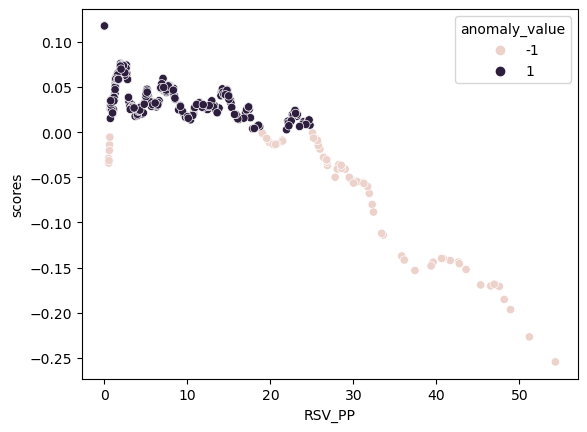

In [55]:
sns.scatterplot(x = 'RSV_PP', y = 'scores', hue = 'anomaly_value', data = df_r12)
plt.show()

In [56]:
df_r12  = df_r12[df_r12.anomaly_value != -1]

In [57]:
df_r12 = df_r12.drop(['weekending','scores', 'anomaly_value'], axis = 1)
df_r12.head()

RSV_PP
Year        
2009     0.0
2009     0.0
2009     0.0
2009     1.0
2009     0.0

In [58]:
rsv_r12 = df_r12.copy()
rsv_r12.head()

RSV_PP
Year        
2009     0.0
2009     0.0
2009     0.0
2009     1.0
2009     0.0

In [59]:
window_size = 5
X_r12, y_r12 = df_to_X_y(df_r12, window_size)
X_r12.shape, y_r12.shape

((492, 5, 1, 1), (492, 1))

In [60]:
X_train_r12, y_train_r12 = X_r12[:250], y_r12[:250]
X_val_r12, y_val_r12 = X_r12[250:400], y_r12[250:400]
X_test_r12, y_test_r12 = X_r12[400:], y_r12[400:]

X_train_r12.shape, y_train_r12.shape, X_test_r12.shape, y_test_r12.shape

((250, 5, 1, 1), (250, 1), (92, 5, 1, 1), (92, 1))

In [61]:
# Tunner search
tuner.search(X_train_r12, y_train_r12, epochs = 10, validation_data = (X_val_r12, y_val_r12))

INFO:tensorflow:Oracle triggered exit


In [62]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r12 = optimum_model.fit(X_train_r12, y_train_r12, epochs = nb_epochs, validation_split= 0.1).history


Epoch 1/25
8/8 [==============================] - 1s 29ms/step - loss: 4.0765 - root_mean_squared_error: 8.1751 - val_loss: 1.4030 - val_root_mean_squared_error: 6.4433
Epoch 2/25
8/8 [==============================] - 0s 8ms/step - loss: 2.5805 - root_mean_squared_error: 5.7816 - val_loss: 0.8153 - val_root_mean_squared_error: 5.3131
Epoch 3/25
8/8 [==============================] - 0s 8ms/step - loss: 2.8354 - root_mean_squared_error: 5.0979 - val_loss: 0.9967 - val_root_mean_squared_error: 5.0260
Epoch 4/25
8/8 [==============================] - 0s 10ms/step - loss: 2.4582 - root_mean_squared_error: 4.9166 - val_loss: 0.9599 - val_root_mean_squared_error: 4.7683
Epoch 5/25
8/8 [==============================] - 0s 10ms/step - loss: 2.5801 - root_mean_squared_error: 4.6899 - val_loss: 0.6063 - val_root_mean_squared_error: 4.5946
Epoch 6/25
8/8 [==============================] - 0s 10ms/step - loss: 2.1550 - root_mean_squared_error: 4.4965 - val_loss: 0.7363 - val_root_mean_squared_er

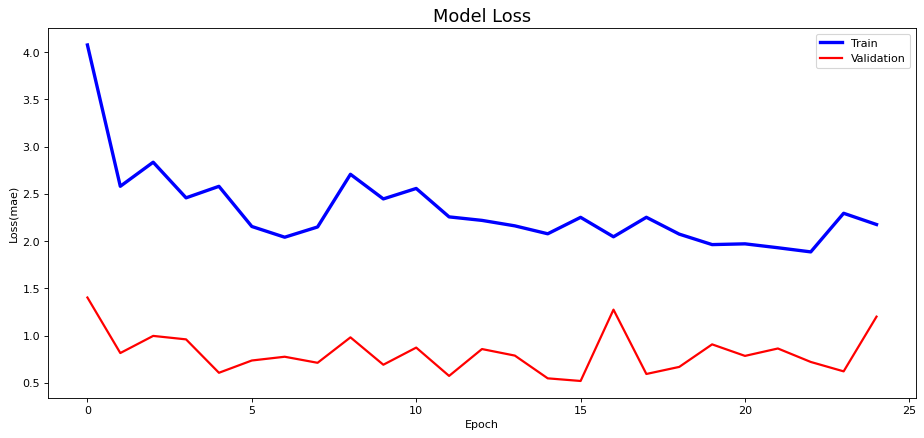

In [63]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r12['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r12['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

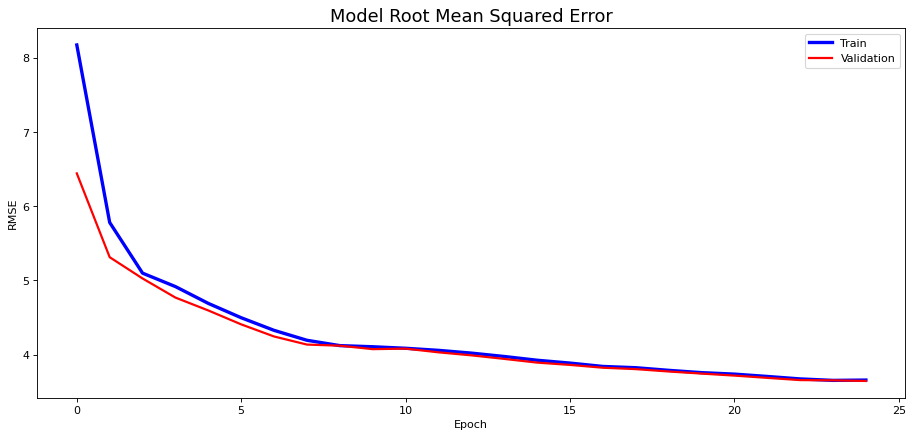

In [64]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r12['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r12['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

3/3 [==============================] - 0s 2ms/step


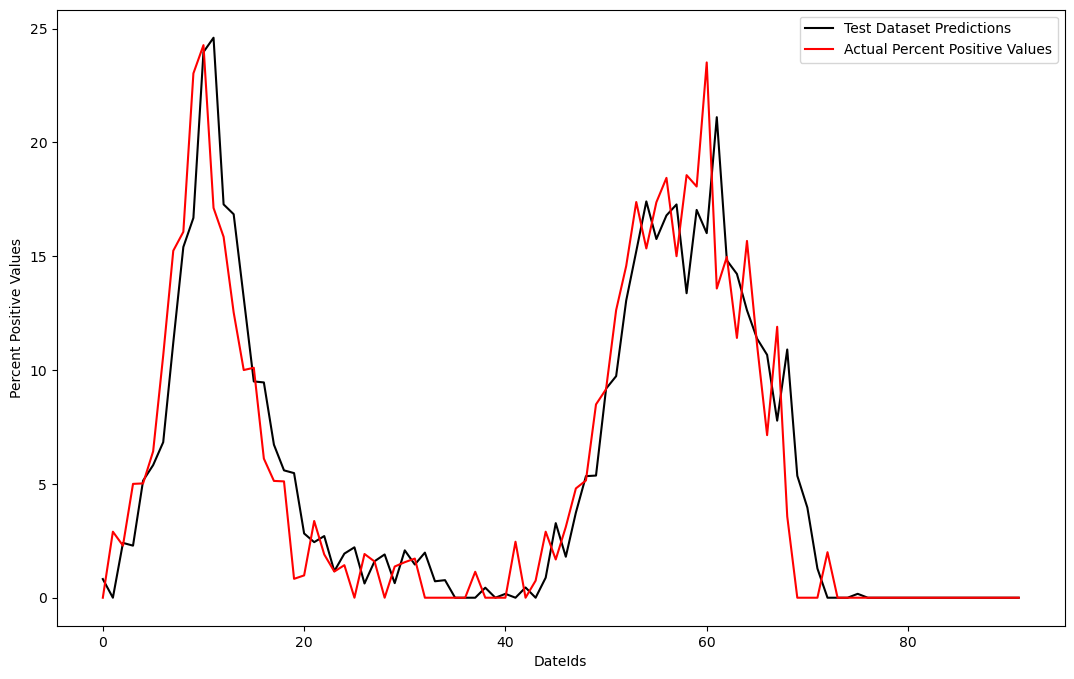

In [65]:
test_pred_r12 = optimum_model.predict(X_test_r12).flatten()
test_results_r12 = pd.DataFrame(data={'Test Predictions': test_pred_r12, 'Actual Percent Positive Values':y_test_r12.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r12['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r12['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [66]:
error_r12= mean_squared_error(y_test_r12, test_pred_r12)
print("RootMeanSquaredError: ", np.sqrt(error_r12))

mae_r12 = mean_absolute_error(y_test_r12, test_pred_r12)
print("Mean Absolute Error: ", mae_r12)


RootMeanSquaredError:  2.513430770629684
Mean Absolute Error:  1.6106196738973908


### SARIMA Model

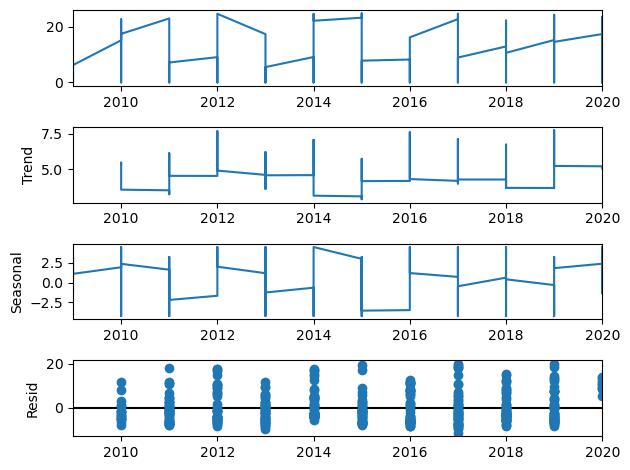

In [67]:
seasonal_decompose(df_r12, model='additive', period=60).plot();

In [68]:
adf_test(df_r12['RSV_PP'])

1. ADF :  -6.878787807763084
2. P-Value :  1.4513605369908217e-09
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 491
5. Critical Values :
	 1% :  -3.4437386290417082
	 5% :  -2.867444458865948
	 10% :  -2.5699148492415413
The series is stationary


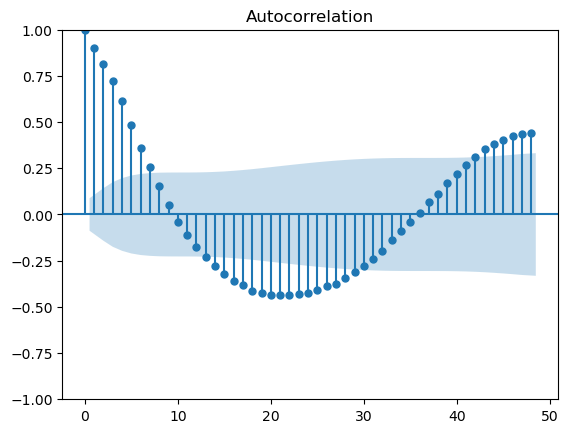

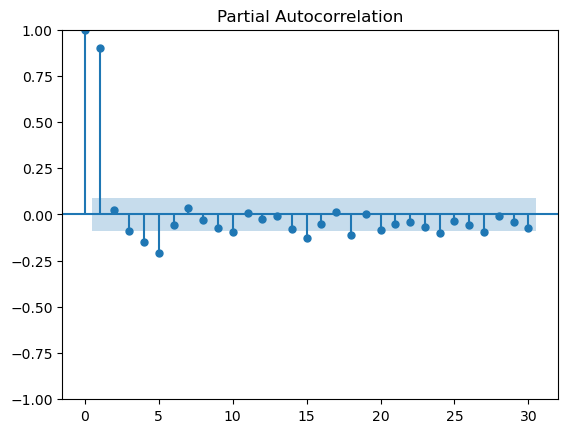

In [69]:
plot_acf(df_r12['RSV_PP'], lags=48);
plot_pacf(df_r12['RSV_PP'], lags=30);

In [70]:
result_df_r12 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r12['RSV_PP'])
result_df_r12

  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0   (1, 0, 1, 0)  2445.102954
1   (1, 0, 0, 1)  2445.391986
2   (1, 1, 1, 0)  2446.242959
3   (1, 1, 0, 1)  2446.461828
4   (1, 0, 1, 1)  2447.101180
5   (1, 1, 1, 1)  2448.231655
6   (1, 0, 0, 0)  2452.911103
7   (1, 1, 0, 0)  2454.050855
8   (0, 1, 1, 1)  2740.743685
9   (0, 1, 1, 0)  2750.024959
10  (0, 1, 0, 1)  2818.576177
11  (0, 0, 1, 1)  3055.662841
12  (0, 1, 0, 0)  3059.527267
13  (0, 0, 1, 0)  3082.747613
14  (0, 0, 0, 1)  3188.476579
15  (0, 0, 0, 0)  3506.252706

In [124]:
best_model_r12 = SARIMAX(df_r12['RSV_PP'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 4)).fit(dis=-1)
print(best_model_r12.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            RSV_PP   No. Observations:                  497
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 4)   Log Likelihood               -1219.551
Date:                           Thu, 02 Feb 2023   AIC                           2445.103
Time:                                   13:43:33   BIC                           2457.729
Sample:                                        0   HQIC                          2450.059
                                           - 497                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9222      0.012     79.247      0.000       0.899       0.945
ar.S.L4        0.1454      0.037      3.913

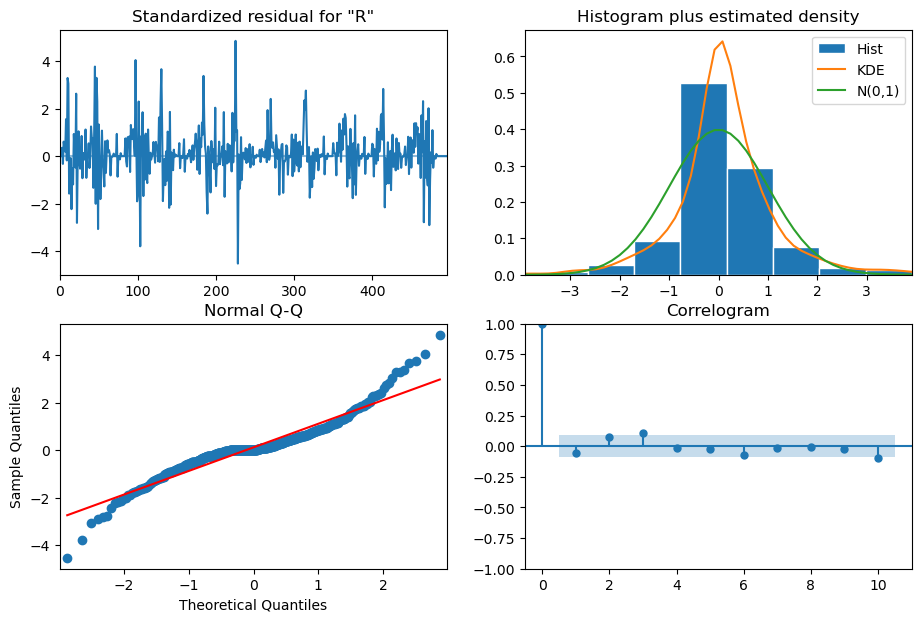

In [125]:
best_model_r12.plot_diagnostics(figsize=(11,7));

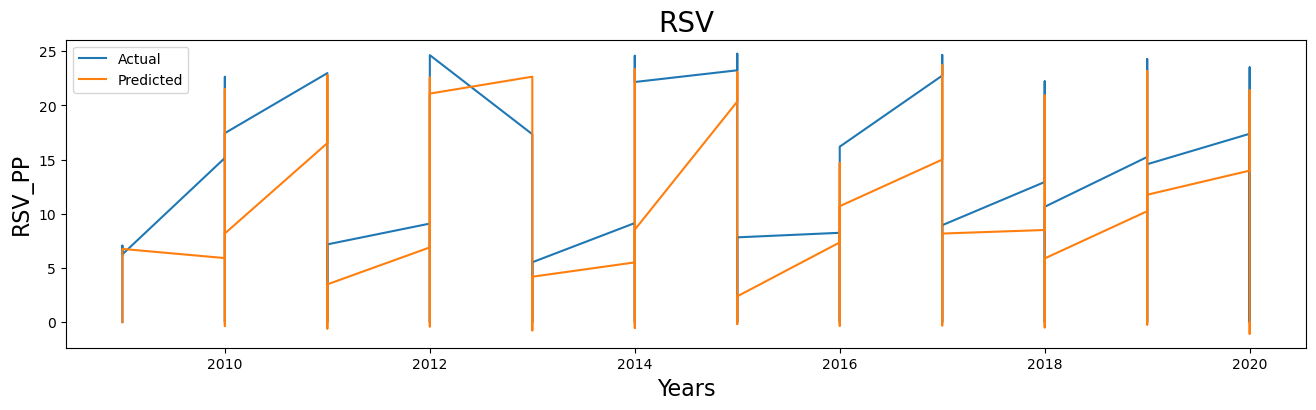

In [126]:
pred_r12 = best_model_r12.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r12['RSV_PP'], label="Actual")
plt.plot(pred_r12, label="Predicted")
plt.title('RSV', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('RSV_PP', fontsize=16)
plt.legend()

In [127]:
error_r2= mean_squared_error(df_r12['RSV_PP'], pred_r12)
print("RootMeanSquaredError: ", np.sqrt(error_r2))

mae_r2 = mean_absolute_error(df_r12['RSV_PP'], pred_r12)
print("Mean Absolute Error: ", mae_r2)


RootMeanSquaredError:  2.8085564853975464
Mean Absolute Error:  1.7996018126632798


## **Adenovirus**

In [128]:
df_reg1_rv3 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Adenovirus']
df_reg1_rv3

season  weekending   region respiratory_virus  number_positive  \
7311  2013-2014  05-10-2013  Central        Adenovirus                0   
7315  2013-2014  12-10-2013  Central        Adenovirus                0   
7319  2013-2014  19-10-2013  Central        Adenovirus                0   
7323  2013-2014  26-10-2013  Central        Adenovirus                1   
7327  2013-2014  02-11-2013  Central        Adenovirus                1   
...         ...         ...      ...               ...              ...   
9601  2019-2020  29-08-2020  Central        Adenovirus                1   
9607  2019-2020  05-09-2020  Central        Adenovirus                0   
9613  2019-2020  12-09-2020  Central        Adenovirus                0   
9619  2019-2020  19-09-2020  Central        Adenovirus                0   
9625  2019-2020  26-09-2020  Central        Adenovirus                1   

      specimens_tested  percent_positive  
7311                73              0.00  
7315                88              0.00  
7319               101              0.00  
7323                67              1.49  
7327                72              1.39  
...                ...               ...  
9601                38              2.63  
9607                34              0.00  
9613                31              0.00  
9619                28              0.00  
9625                43              2.33  

[365 rows x 7 columns]

In [129]:
df_r13 = df_reg1_rv3[['weekending', 'percent_positive']]
df_r13['Adeno_PP'] = df_r13['percent_positive']
df_r13 = df_r13.drop(['percent_positive'], axis = 1)
df_r13['Year'] = pd.DatetimeIndex(df_r13['weekending']).year
df_r13.head()

weekending  Adeno_PP  Year
7311  05-10-2013      0.00  2013
7315  12-10-2013      0.00  2013
7319  19-10-2013      0.00  2013
7323  26-10-2013      1.49  2013
7327  02-11-2013      1.39  2013

In [130]:
df_r13['Adeno_PP'].describe()

count    365.000000
mean       3.853753
std        2.994781
min        0.000000
25%        2.040000
50%        3.360000
75%        5.340000
max       22.220000
Name: Adeno_PP, dtype: float64

In [131]:
# plotting scattered graph
fig = px.scatter(df_r13, x='Year', y='Adeno_PP')
fig.show()

In [132]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model_r13=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model_r13.fit(df_r13[['Adeno_PP']].values)
df_r13['scores']=forest_model_r13.decision_function(df_r13[['Adeno_PP']].values)
df_r13['anomaly_value']=forest_model_r13.predict(df_r13[['Adeno_PP']].values)
print(df_r13.head(10))
print("Anomaly Values")
print(df_r13['anomaly_value'].value_counts())

      weekending  Adeno_PP  Year    scores  anomaly_value
7311  05-10-2013      0.00  2013  0.013180              1
7315  12-10-2013      0.00  2013  0.013180              1
7319  19-10-2013      0.00  2013  0.013180              1
7323  26-10-2013      1.49  2013  0.026794              1
7327  02-11-2013      1.39  2013  0.003273              1
7331  09-11-2013      2.00  2013  0.046915              1
7335  16-11-2013      0.00  2013  0.013180              1
7339  23-11-2013      2.25  2013  0.058617              1
7343  30-11-2013      2.30  2013  0.073755              1
7347  07-12-2013      2.68  2013  0.070163              1
Anomaly Values
 1    317
-1     48
Name: anomaly_value, dtype: int64


In [133]:
df_r13.set_index('Year', drop = True, inplace = True)
a_r13 = df_r13.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_r13.index.astype(str),y=df_r13['Adeno_PP'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_r13.index.astype(str),y=a_r13['Adeno_PP'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

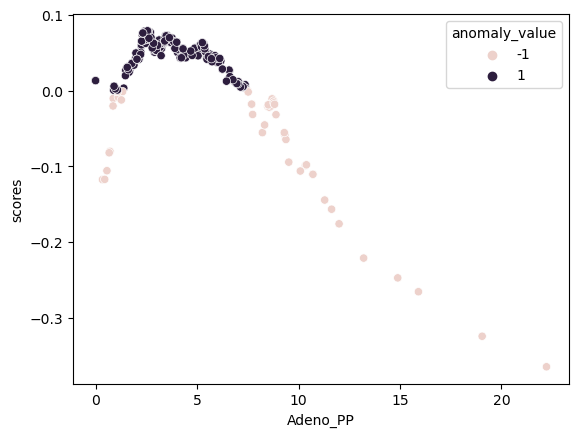

In [134]:
sns.scatterplot(x = 'Adeno_PP', y = 'scores', hue = 'anomaly_value', data = df_r13)
plt.show()

In [135]:
df_r13  = df_r13[df_r13.anomaly_value != -1]

In [136]:
df_r13 = df_r13.drop(['weekending','scores', 'anomaly_value'], axis = 1)
df_r13.head()

Adeno_PP
Year          
2013      0.00
2013      0.00
2013      0.00
2013      1.49
2013      1.39

In [137]:
window_size = 5
X_r13, y_r13 = df_to_X_y(df_r13, window_size)
X_r13.shape, y_r13.shape

((312, 5, 1, 1), (312, 1))

In [138]:
X_train_r13, y_train_r13 = X_r13[:150], y_r13[:150]
X_val_r13, y_val_r13 = X_r13[150:250], y_r13[150:250]
X_test_r13, y_test_r13 = X_r13[250:], y_r13[250:]

X_train_r13.shape, y_train_r13.shape, X_test_r13.shape, y_test_r13.shape,  X_val_r13.shape, y_val_r13.shape

((150, 5, 1, 1), (150, 1), (62, 5, 1, 1), (62, 1), (100, 5, 1, 1), (100, 1))

In [139]:
# Tunner search
tuner.search(X_train_r13, y_train_r13, epochs = 10, validation_data = (X_val_r13, y_val_r13))

INFO:tensorflow:Oracle triggered exit


In [140]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r13 = optimum_model.fit(X_train_r13, y_train_r13, epochs = nb_epochs, validation_split= 0.1).history


Epoch 1/25
5/5 [==============================] - 1s 69ms/step - loss: 1.8022 - root_mean_squared_error: 2.6061 - val_loss: 1.5455 - val_root_mean_squared_error: 2.2339
Epoch 2/25
5/5 [==============================] - 0s 18ms/step - loss: 1.5857 - root_mean_squared_error: 2.1961 - val_loss: 0.9815 - val_root_mean_squared_error: 2.1032
Epoch 3/25
5/5 [==============================] - 0s 17ms/step - loss: 1.1664 - root_mean_squared_error: 1.9891 - val_loss: 1.4317 - val_root_mean_squared_error: 1.9338
Epoch 4/25
5/5 [==============================] - 0s 18ms/step - loss: 1.2814 - root_mean_squared_error: 1.8820 - val_loss: 0.9506 - val_root_mean_squared_error: 1.8556
Epoch 5/25
5/5 [==============================] - 0s 17ms/step - loss: 1.1410 - root_mean_squared_error: 1.8114 - val_loss: 0.9766 - val_root_mean_squared_error: 1.7781
Epoch 6/25
5/5 [==============================] - 0s 18ms/step - loss: 1.1325 - root_mean_squared_error: 1.7445 - val_loss: 0.9661 - val_root_mean_squared_

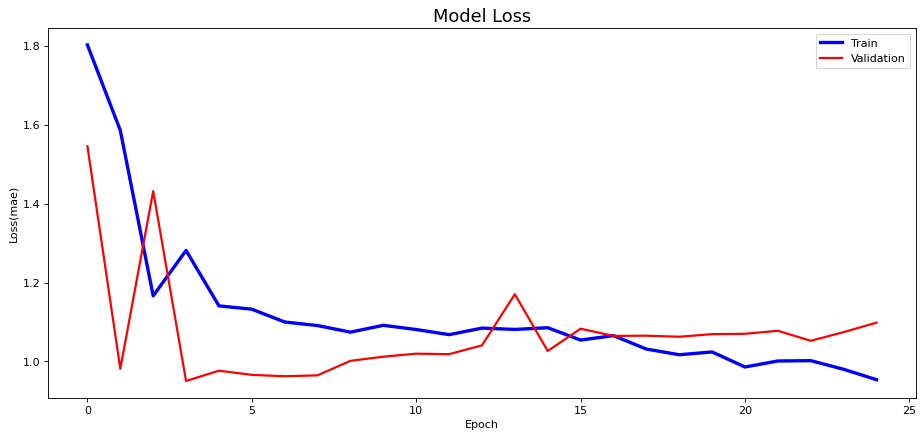

In [141]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r13['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r13['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

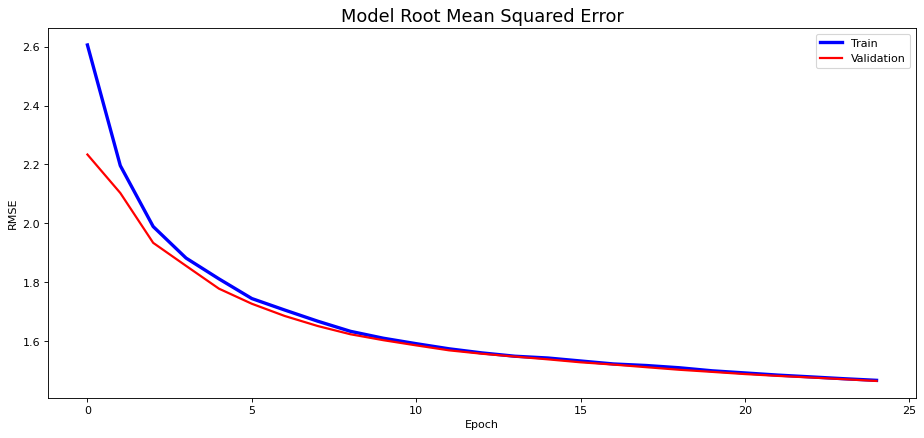

In [142]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r13['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r13['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

2/2 [==============================] - 0s 525us/step


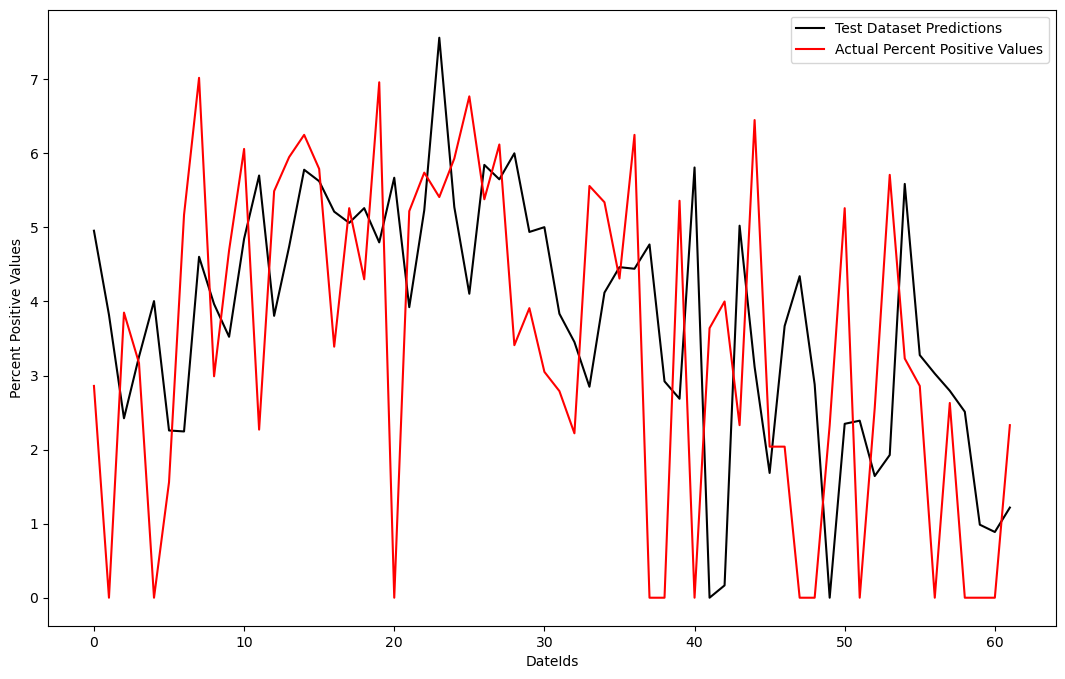

In [143]:
test_pred_r13 = optimum_model.predict(X_test_r13).flatten()
test_results_r13 = pd.DataFrame(data={'Test Predictions': test_pred_r13, 'Actual Percent Positive Values':y_test_r13.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r13['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r13['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [144]:
error_r13= mean_squared_error(y_test_r13, test_pred_r13)
print("RootMeanSquaredError: ", np.sqrt(error_r13))

mae_r13 = mean_absolute_error(y_test_r13, test_pred_r13)
print("Mean Absolute Error: ", mae_r13)


RootMeanSquaredError:  2.414516278711473
Mean Absolute Error:  1.987557660273967


### SARIMA Model

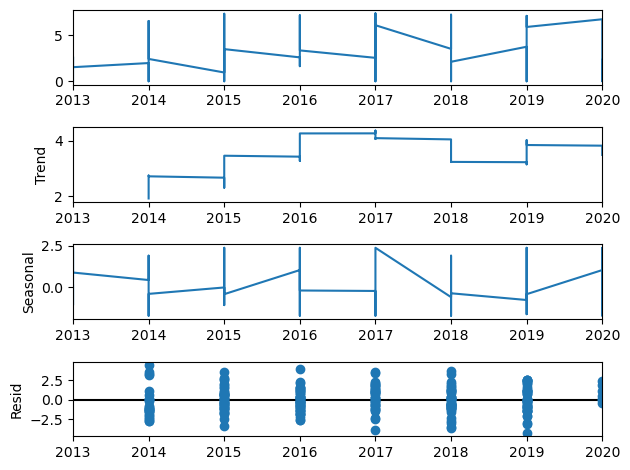

In [145]:
seasonal_decompose(df_r13, model='additive', period=60).plot();

In [146]:
adf_test(df_r13['Adeno_PP'])

1. ADF :  -4.380940151521795
2. P-Value :  0.00032075561043384
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 312
5. Critical Values :
	 1% :  -3.4514843502727306
	 5% :  -2.8708485956333556
	 10% :  -2.571729625657462
The series is stationary


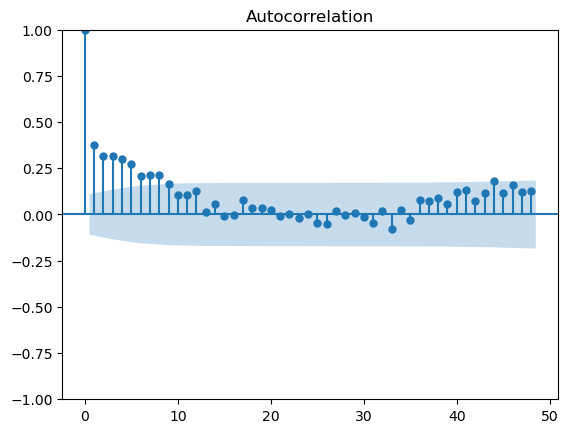

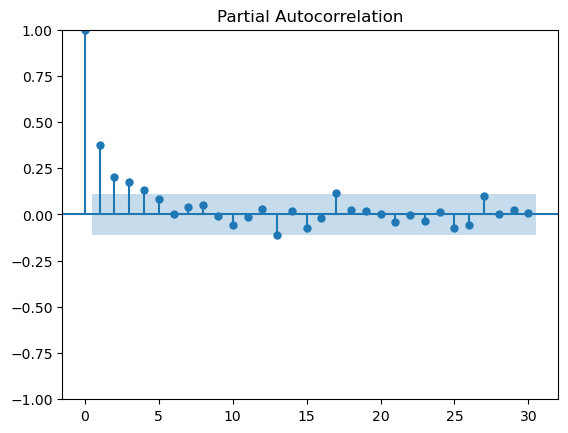

In [147]:
plot_acf(df_r13['Adeno_PP'], lags=48);
plot_pacf(df_r13['Adeno_PP'], lags=30);

In [95]:
result_df_r13 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r13['Adeno_PP'])
result_df_r13

  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0   (1, 1, 1, 1)  1281.084935
1   (1, 1, 0, 0)  1281.841938
2   (1, 1, 1, 0)  1283.838517
3   (1, 1, 0, 1)  1283.839060
4   (1, 0, 1, 1)  1308.604465
5   (0, 1, 1, 1)  1320.490508
6   (0, 0, 1, 1)  1346.702289
7   (1, 0, 0, 0)  1388.387105
8   (1, 0, 1, 0)  1389.318656
9   (1, 0, 0, 1)  1389.686995
10  (0, 1, 1, 0)  1419.634632
11  (0, 0, 1, 0)  1429.391629
12  (0, 1, 0, 1)  1512.507361
13  (0, 1, 0, 0)  1589.147389
14  (0, 0, 0, 1)  1608.545075
15  (0, 0, 0, 0)  1765.234824

In [148]:
best_model_r13 = SARIMAX(df_r13['Adeno_PP'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 4)).fit(dis=-1)
print(best_model_r13.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          Adeno_PP   No. Observations:                  317
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood                -624.690
Date:                           Thu, 02 Feb 2023   AIC                           1259.380
Time:                                   13:44:23   BIC                           1278.175
Sample:                                        0   HQIC                          1266.888
                                           - 317                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9584      0.025     38.164      0.000       0.909       1.008
ma.L1         -0.7212      0.055    -13.017

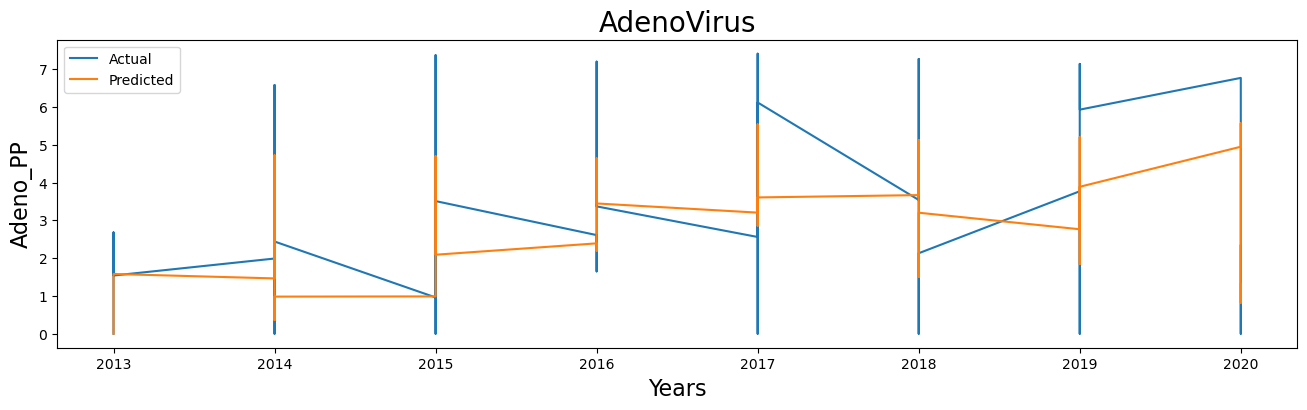

In [149]:
pred_r13 = best_model_r13.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r13['Adeno_PP'], label="Actual")
plt.plot(pred_r13, label="Predicted")
plt.title('AdenoVirus', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Adeno_PP', fontsize=16)
plt.legend()

In [150]:
error_r3= mean_squared_error(df_r13['Adeno_PP'], pred_r13)
print("RootMeanSquaredError: ", np.sqrt(error_r3))

mae_r3 = mean_absolute_error(df_r13['Adeno_PP'], pred_r13)
print("Mean Absolute Error: ", mae_r3)

RootMeanSquaredError:  1.7308266128355443
Mean Absolute Error:  1.366110511626181


## **HMPV**

In [151]:
df_reg1_rv4 = df_reg1.loc[df_reg1['respiratory_virus'] == 'HMPV']
df_reg1_rv4

season  weekending   region respiratory_virus  number_positive  \
9631   2013-2014  05-10-2013  Central              HMPV                1   
9635   2013-2014  12-10-2013  Central              HMPV                1   
9639   2013-2014  19-10-2013  Central              HMPV                0   
9643   2013-2014  26-10-2013  Central              HMPV                0   
9647   2013-2014  02-11-2013  Central              HMPV                0   
...          ...         ...      ...               ...              ...   
11914  2019-2020  29-08-2020  Central              HMPV                0   
11920  2019-2020  05-09-2020  Central              HMPV                0   
11926  2019-2020  12-09-2020  Central              HMPV                0   
11932  2019-2020  19-09-2020  Central              HMPV                0   
11938  2019-2020  26-09-2020  Central              HMPV                0   

       specimens_tested  percent_positive  
9631                 73              1.37  
9635                 88              1.14  
9639                 90              0.00  
9643                 56              0.00  
9647                 57              0.00  
...                 ...               ...  
11914                38              0.00  
11920                34              0.00  
11926                31              0.00  
11932                28              0.00  
11938                43              0.00  

[365 rows x 7 columns]

In [152]:
df_r14 = df_reg1_rv4[['weekending', 'percent_positive']]
df_r14['HMPV_PP'] = df_r14['percent_positive']
df_r14 = df_r14.drop(['percent_positive'], axis = 1)
df_r14['Year'] = pd.DatetimeIndex(df_r14['weekending']).year
df_r14.head()

weekending  HMPV_PP  Year
9631  05-10-2013     1.37  2013
9635  12-10-2013     1.14  2013
9639  19-10-2013     0.00  2013
9643  26-10-2013     0.00  2013
9647  02-11-2013     0.00  2013

In [153]:
df_r14['HMPV_PP'].describe()

count    365.000000
mean       3.100274
std        4.169301
min        0.000000
25%        0.000000
50%        1.350000
75%        4.550000
max       19.350000
Name: HMPV_PP, dtype: float64

In [154]:
# plotting scattered graph
fig = px.scatter(df_r14, x='Year', y='HMPV_PP')
fig.show()

In [155]:
max_features=1.0
n_estimators=100
max_samples='auto'
contamination=float(0.13)
forest_model_r14=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model_r14.fit(df_r14[['HMPV_PP']].values)
df_r14['scores']=forest_model_r14.decision_function(df_r14[['HMPV_PP']].values)
df_r14['anomaly_value']=forest_model_r14.predict(df_r14[['HMPV_PP']].values)
print(df_r14.head(10))
print("Anomaly Values")
print(df_r14['anomaly_value'].value_counts())

      weekending  HMPV_PP  Year    scores  anomaly_value
9631  05-10-2013     1.37  2013  0.081073              1
9635  12-10-2013     1.14  2013  0.084085              1
9639  19-10-2013     0.00  2013  0.127721              1
9643  26-10-2013     0.00  2013  0.127721              1
9647  02-11-2013     0.00  2013  0.127721              1
9651  09-11-2013     5.33  2013  0.024615              1
9655  16-11-2013     1.67  2013  0.075179              1
9659  23-11-2013     8.82  2013  0.011575              1
9663  30-11-2013     8.33  2013  0.025111              1
9667  07-12-2013     5.48  2013  0.027737              1
Anomaly Values
 1    317
-1     48
Name: anomaly_value, dtype: int64


In [156]:
df_r14.set_index('Year', drop = True, inplace = True)
a_r14 = df_r14.query('anomaly_value == -1')
# plotting the graph for outliers
normal = go.Scatter(x=df_r14.index.astype(str),y=df_r14['HMPV_PP'],name="Dataset",mode='markers')
outlier = go.Scatter(x=a_r14.index.astype(str),y=a_r14['HMPV_PP'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Percent_Positive',xaxis_title='Year',)

# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

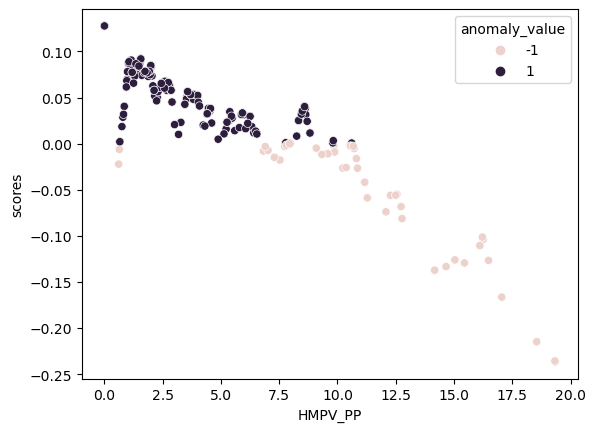

In [157]:
sns.scatterplot(x = 'HMPV_PP', y = 'scores', hue = 'anomaly_value', data = df_r14)
plt.show()

In [158]:
df_r14  = df_r14[df_r14.anomaly_value != -1]

In [159]:
df_r14 = df_r14.drop(['weekending','scores', 'anomaly_value'], axis = 1)
df_r14.head()

HMPV_PP
Year         
2013     1.37
2013     1.14
2013     0.00
2013     0.00
2013     0.00

In [160]:
window_size = 5
X_r14, y_r14 = df_to_X_y(df_r14, window_size)
X_r14.shape, y_r14.shape

((312, 5, 1, 1), (312, 1))

In [161]:
X_train_r14, y_train_r14 = X_r14[:135], y_r14[:135]
X_val_r14, y_val_r14 = X_r14[135:250], y_r14[135:250]
X_test_r14, y_test_r14 = X_r14[250:], y_r14[250:]

X_train_r14.shape, y_train_r14.shape, X_test_r14.shape, y_test_r14.shape, X_val_r14.shape, y_val_r14.shape

((135, 5, 1, 1), (135, 1), (62, 5, 1, 1), (62, 1), (115, 5, 1, 1), (115, 1))

In [162]:
# Tunner search
tuner.search(X_train_r14, y_train_r14, epochs = 10, validation_data = (X_val_r14, y_val_r14))

INFO:tensorflow:Oracle triggered exit


In [163]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r14 = optimum_model.fit(X_train_r14, y_train_r14, epochs = nb_epochs, validation_split = 0.1).history


Epoch 1/25
4/4 [==============================] - 1s 106ms/step - loss: 1.7345 - root_mean_squared_error: 2.6920 - val_loss: 0.7575 - val_root_mean_squared_error: 2.3245
Epoch 2/25
4/4 [==============================] - 0s 22ms/step - loss: 1.2699 - root_mean_squared_error: 2.1595 - val_loss: 0.6052 - val_root_mean_squared_error: 2.0412
Epoch 3/25
4/4 [==============================] - 0s 23ms/step - loss: 1.0886 - root_mean_squared_error: 1.9464 - val_loss: 0.5688 - val_root_mean_squared_error: 1.8944
Epoch 4/25
4/4 [==============================] - 0s 22ms/step - loss: 1.1043 - root_mean_squared_error: 1.8445 - val_loss: 0.6063 - val_root_mean_squared_error: 1.8172
Epoch 5/25
4/4 [==============================] - 0s 20ms/step - loss: 1.0592 - root_mean_squared_error: 1.7677 - val_loss: 0.5929 - val_root_mean_squared_error: 1.7563
Epoch 6/25
4/4 [==============================] - 0s 17ms/step - loss: 1.0362 - root_mean_squared_error: 1.7319 - val_loss: 0.5611 - val_root_mean_squared

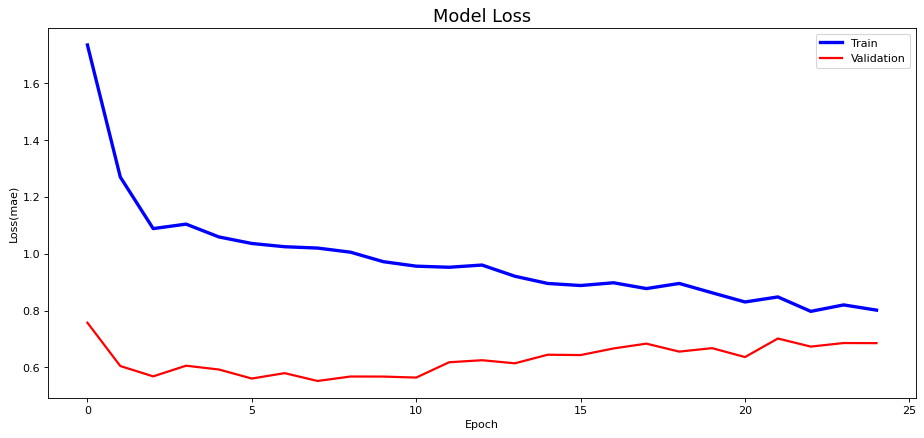

In [164]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r14['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r14['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

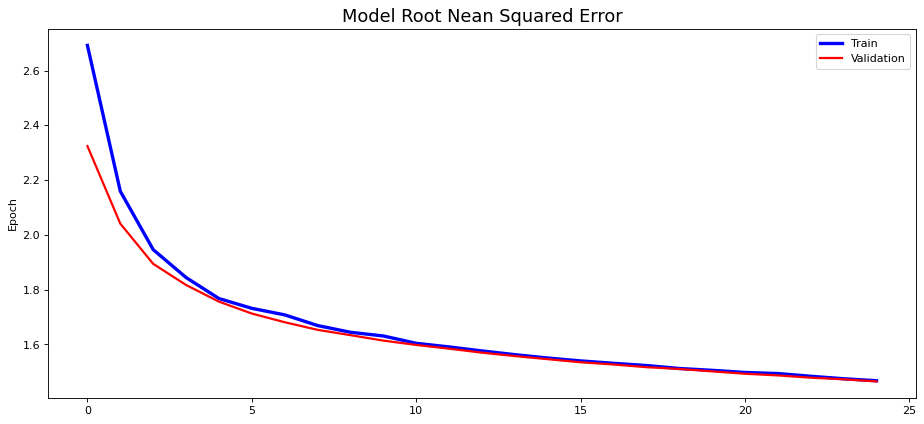

In [165]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r14['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r14['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Nean Squared Error', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_ylabel("Epoch")
ax.legend(loc='upper right')
plt.show()

2/2 [==============================] - 0s 3ms/step


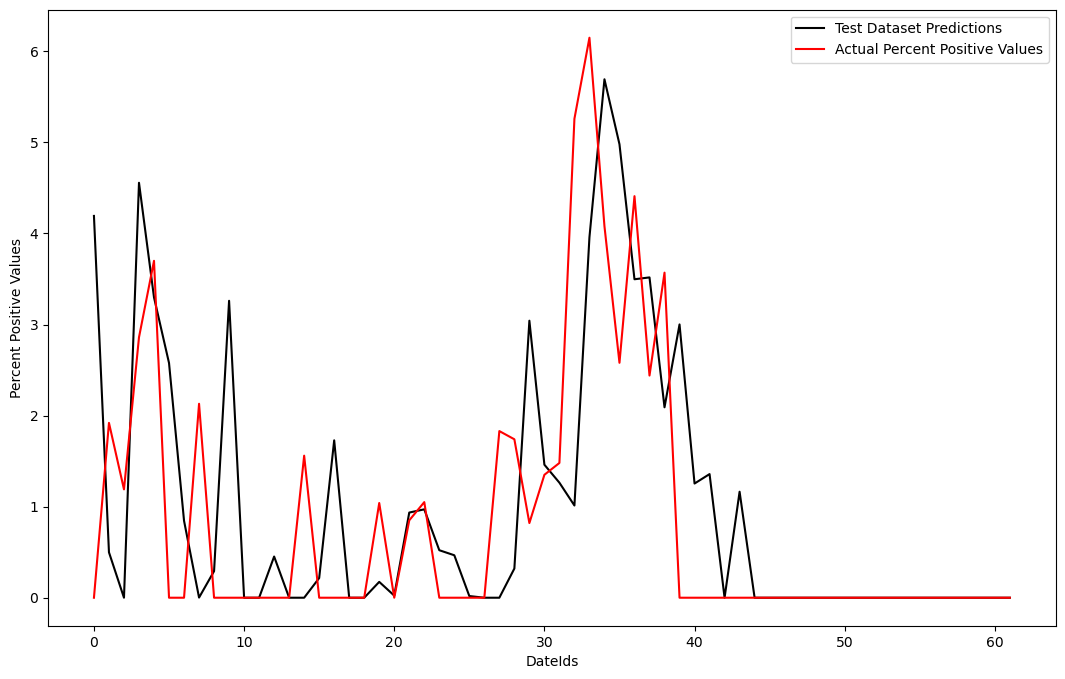

In [166]:
test_pred_r14 = optimum_model.predict(X_test_r14).flatten()
test_results_r14 = pd.DataFrame(data={'Test Predictions': test_pred_r14, 'Actual Percent Positive Values':y_test_r14.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r14['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r14['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [167]:
error_r14= mean_squared_error(y_test_r14, test_pred_r14)
print("RootMeanSquaredError: ", np.sqrt(error_r14))

mae_r14 = mean_absolute_error(y_test_r14, test_pred_r14)
print("Mean Absolute Error: ", mae_r14)


RootMeanSquaredError:  1.3507392759482546
Mean Absolute Error:  0.8148664879913051


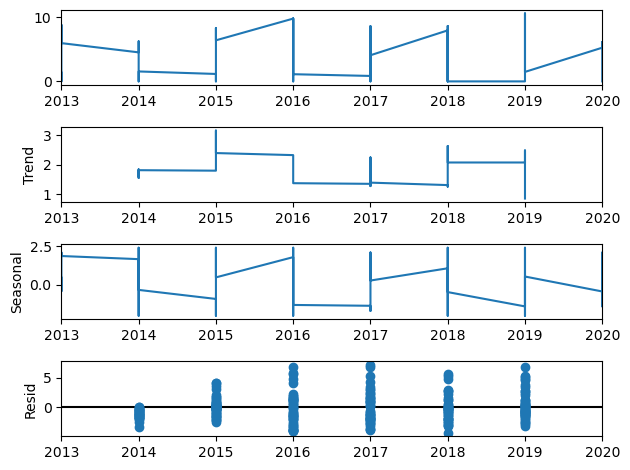

In [168]:
seasonal_decompose(df_r14, model='additive', period=60).plot();

In [169]:
adf_test(df_r14['HMPV_PP'])

1. ADF :  -4.937591145541684
2. P-Value :  2.9451172724068524e-05
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944
The series is stationary


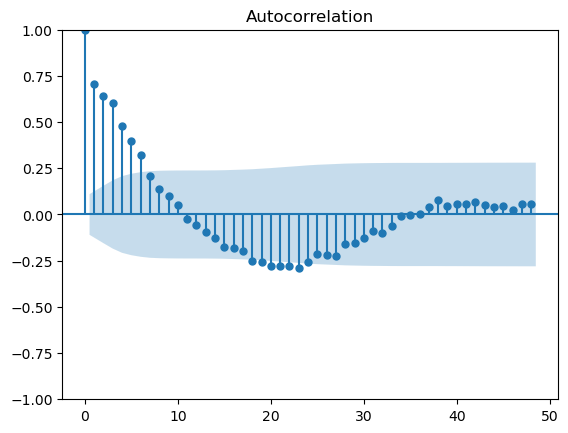

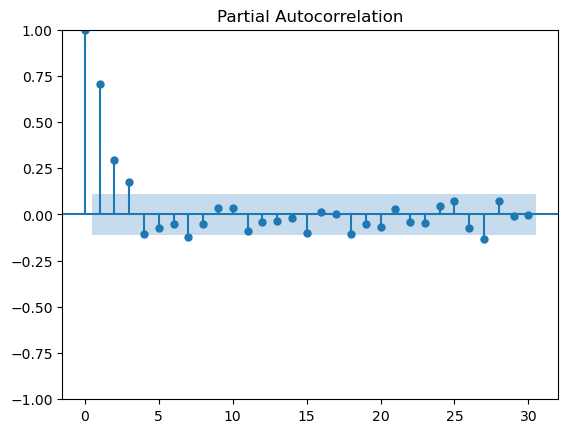

In [170]:
plot_acf(df_r14['HMPV_PP'], lags=48);
plot_pacf(df_r14['HMPV_PP'], lags=30);

In [171]:
result_df_r14 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r14['HMPV_PP'])
result_df_r14

  0%|          | 0/16 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0   (1, 1, 0, 0)  1235.171996
1   (1, 1, 0, 1)  1237.130839
2   (1, 1, 1, 0)  1237.138042
3   (1, 1, 1, 1)  1237.140510
4   (1, 0, 1, 1)  1270.121919
5   (1, 0, 0, 0)  1276.703498
6   (1, 0, 0, 1)  1278.703448
7   (1, 0, 1, 0)  1278.703448
8   (0, 1, 1, 1)  1359.605352
9   (0, 1, 1, 0)  1363.727197
10  (0, 1, 0, 1)  1387.798239
11  (0, 0, 1, 0)  1430.585668
12  (0, 0, 1, 1)  1432.585295
13  (0, 1, 0, 0)  1445.450827
14  (0, 0, 0, 1)  1485.907912
15  (0, 0, 0, 0)  1617.320211

In [172]:
best_model_r14 = SARIMAX(df_r14['HMPV_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 4)).fit(dis=-1)
print(best_model_r14.summary())

                               SARIMAX Results                                
Dep. Variable:                HMPV_PP   No. Observations:                  317
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -614.586
Date:                Thu, 02 Feb 2023   AIC                           1235.172
Time:                        13:44:38   BIC                           1246.449
Sample:                             0   HQIC                          1239.676
                                - 317                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9390      0.017     54.623      0.000       0.905       0.973
ma.L1         -0.4194      0.051     -8.291      0.000      -0.519      -0.320
sigma2         2.8164      0.146     19.248      0.0

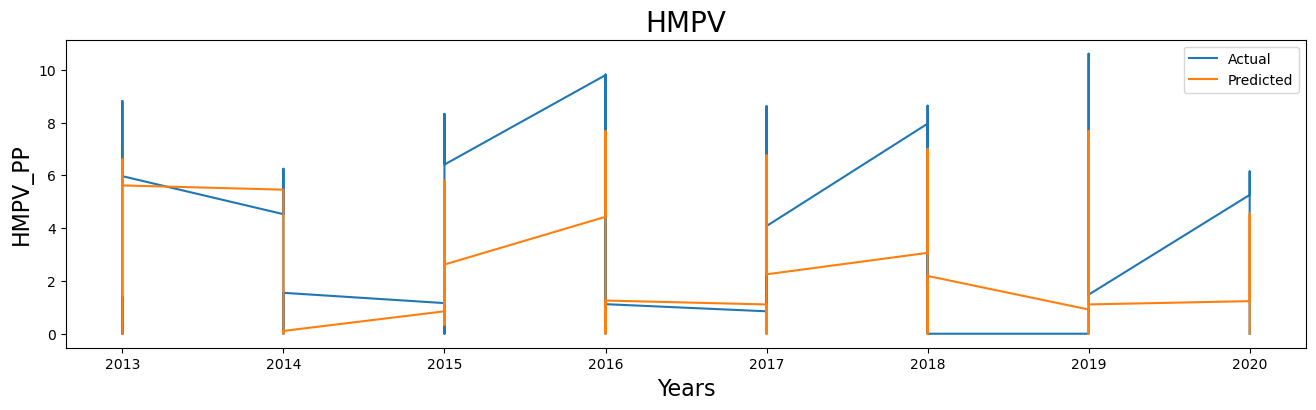

In [173]:
pred_r14 = best_model_r14.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r14['HMPV_PP'], label="Actual")
plt.plot(pred_r14, label="Predicted")
plt.title('HMPV', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('HMPV_PP', fontsize=16)
plt.legend()

In [174]:
error_r4= mean_squared_error(df_r14['HMPV_PP'], pred_r14)
print("RootMeanSquaredError: ", np.sqrt(error_r4))

mae_r4 = mean_absolute_error(df_r14['HMPV_PP'], pred_r14)
print("Mean Absolute Error: ", mae_r4)

RootMeanSquaredError:  1.6794554328735434
Mean Absolute Error:  1.0925120940908275
